## Chuyển từ 3D sang 2D

### covid_lung_infection

#### 1. Config
Chỉ cần sửa PROJECT_DIR

In [26]:
import os

PROJECT_DIR = r"D:\Code\PythonProject\Advanced\multi_task_ct"
RAW_ROOT = os.path.join(PROJECT_DIR, "data", "raw", "covid_lung_infection")

rename_map = {
    "COVID-19-CT-Seg_20cases": "CT",
    "Lung_Mask": "mask_lung",
    "Infection_Mask": "mask_infection",
    "Lung_and_Infection_Mask": "mask_multi",
}

print("== Trước khi rename ==")
for d in os.listdir(RAW_ROOT):
    print(" -", d)

for old, new in rename_map.items():
    old_p = os.path.join(RAW_ROOT, old)
    new_p = os.path.join(RAW_ROOT, new)
    if os.path.exists(old_p):
        print(f"Đổi tên: {old} → {new}")
        os.rename(old_p, new_p)
    else:
        print(f"⚠️ Không tìm thấy {old_p}, bỏ qua")

print("\n== Sau khi rename ==")
for d in os.listdir(RAW_ROOT):
    print(" -", d)

== Trước khi rename ==
 - CT
 - mask_infection
 - mask_lung
 - mask_multi
⚠️ Không tìm thấy D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases, bỏ qua
⚠️ Không tìm thấy D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\Lung_Mask, bỏ qua
⚠️ Không tìm thấy D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\Infection_Mask, bỏ qua
⚠️ Không tìm thấy D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\Lung_and_Infection_Mask, bỏ qua

== Sau khi rename ==
 - CT
 - mask_infection
 - mask_lung
 - mask_multi


#### 2. Import

In [27]:
import sys

src_dir = os.path.join(PROJECT_DIR, "src")
if src_dir not in sys.path:
    sys.path.append(src_dir)

from preprocess.ct3d_to_2d import process_covid_lung_infection

#### 3. Chạy hàm 

In [28]:
import os
import re

def smart_rename_folder(folder):
    """
    Rename tất cả file .nii trong folder theo quy tắc:
      radiopaedia_10_xxx_xxx -> radiopaedia_10
      Nếu trùng tên -> radiopaedia_10_1, radiopaedia_10_2, ...

    Trả về mapping {old_name: new_name} để dùng rename mask.
    """
    pattern = re.compile(r"(radiopaedia_\d+)")  # lấy prefix chính
    files = [f for f in os.listdir(folder) if f.endswith(".nii")]

    used_names = set()
    mapping = {}

    for f in sorted(files):  # sort để giữ thứ tự ổn định
        match = pattern.match(f)
        if not match:
            continue

        prefix = match.group(1)
        new_name = prefix + ".nii"

        # Nếu đã có tên này, sinh hậu tố _1, _2, _3...
        if new_name in used_names:
            i = 1
            while True:
                alt = f"{prefix}_{i}.nii"
                if alt not in used_names:
                    new_name = alt
                    break
                i += 1

        # rename file
        old_path = os.path.join(folder, f)
        new_path = os.path.join(folder, new_name)

        print(f"{f}  →  {new_name}")
        os.rename(old_path, new_path)

        used_names.add(new_name)
        mapping[f] = new_name

    return mapping


In [29]:
import os

PROJECT_DIR = r"D:\Code\PythonProject\Advanced\multi_task_ct"
RAW_ROOT = os.path.join(PROJECT_DIR, "data", "raw", "covid_lung_infection")

CT_DIR = os.path.join(RAW_ROOT, "CT")
MASK_DIRS = [
    os.path.join(RAW_ROOT, "mask_lung"),
    os.path.join(RAW_ROOT, "mask_infection"),
    os.path.join(RAW_ROOT, "mask_multi"),
]

print("=== RENAME CT ===")
mapping = smart_rename_folder(CT_DIR)

print("\n=== APPLY RENAME TO MASK FOLDERS ===")
for mask_dir in MASK_DIRS:
    print(f"\n📁 Folder: {mask_dir}")

    for old_name, new_name in mapping.items():
        old_path = os.path.join(mask_dir, old_name)
        new_path = os.path.join(mask_dir, new_name)

        if os.path.exists(old_path):
            print(f"{old_name}  →  {new_name}")
            os.rename(old_path, new_path)
        else:
            print(f"⚠️ Không tìm thấy mask: {old_name}")

print("\n✔ DONE RENAMING ALL FOLDERS!")

=== RENAME CT ===
radiopaedia_10.nii  →  radiopaedia_10.nii
radiopaedia_10_1.nii  →  radiopaedia_10_1.nii
radiopaedia_14.nii  →  radiopaedia_14.nii
radiopaedia_27.nii  →  radiopaedia_27.nii
radiopaedia_29.nii  →  radiopaedia_29.nii
radiopaedia_29_1.nii  →  radiopaedia_29_1.nii
radiopaedia_36.nii  →  radiopaedia_36.nii
radiopaedia_4.nii  →  radiopaedia_4.nii
radiopaedia_40.nii  →  radiopaedia_40.nii
radiopaedia_7.nii  →  radiopaedia_7.nii

=== APPLY RENAME TO MASK FOLDERS ===

📁 Folder: D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\mask_lung
radiopaedia_10.nii  →  radiopaedia_10.nii
radiopaedia_10_1.nii  →  radiopaedia_10_1.nii
radiopaedia_14.nii  →  radiopaedia_14.nii
radiopaedia_27.nii  →  radiopaedia_27.nii
radiopaedia_29.nii  →  radiopaedia_29.nii
radiopaedia_29_1.nii  →  radiopaedia_29_1.nii
radiopaedia_36.nii  →  radiopaedia_36.nii
radiopaedia_4.nii  →  radiopaedia_4.nii
radiopaedia_40.nii  →  radiopaedia_40.nii
radiopaedia_7.nii  →  radiopaedia_7.nii


In [30]:
TARGET_SIZE = (512, 512)

meta_df = process_covid_lung_infection(
    raw_root=RAW_ROOT,
    out_root=os.path.join(PROJECT_DIR, "data", "processed", "covid_lung_infection"),
    target_size=(512, 512),
    project_dir=PROJECT_DIR
)

   BẮT ĐẦU CHUYỂN 3D → 2D
Tìm thấy 20 CT volume

🧾 Case: coronacases_001
🧾 Case: coronacases_002
🧾 Case: coronacases_003
🧾 Case: coronacases_004
🧾 Case: coronacases_005
🧾 Case: coronacases_006
🧾 Case: coronacases_007
🧾 Case: coronacases_008
🧾 Case: coronacases_009
🧾 Case: coronacases_010
🧾 Case: radiopaedia_10
🧾 Case: radiopaedia_10_1
🧾 Case: radiopaedia_14
🧾 Case: radiopaedia_27
🧾 Case: radiopaedia_29
🧾 Case: radiopaedia_29_1
🧾 Case: radiopaedia_36
🧾 Case: radiopaedia_4
🧾 Case: radiopaedia_40
🧾 Case: radiopaedia_7

✔ DONE. Tổng số slice: 2973
CSV lưu tại: D:\Code\PythonProject\Advanced\multi_task_ct\data\processed\covid_lung_infection\meta.csv


#### 4. Kiểm tra lại thông tin tiền xử lý 

In [31]:
# Số lượng ảnh từ mỗi mẫu 
import os
import pandas as pd

PROJECT_DIR = r"D:\Code\PythonProject\Advanced\multi_task_ct"
PROC_ROOT = os.path.join(PROJECT_DIR, "data", "processed", "covid_lung_infection")

meta_path = os.path.join(PROC_ROOT, "meta.csv")
meta = pd.read_csv(meta_path)

print("📄 Meta CSV:", meta_path)
print("Tổng số slice:", len(meta))
print()

# Đếm số slice theo case_id
case_counts = meta["case_id"].value_counts()

print("===== SỐ LƯỢNG SLICE MỖI CASE =====")
for case_id, count in case_counts.items():
    print(f"{case_id:25s} : {count} slices")

📄 Meta CSV: D:\Code\PythonProject\Advanced\multi_task_ct\data\processed\covid_lung_infection\meta.csv
Tổng số slice: 2973

===== SỐ LƯỢNG SLICE MỖI CASE =====
radiopaedia_10_1          : 354 slices
coronacases_005           : 270 slices
coronacases_004           : 251 slices
coronacases_008           : 249 slices
coronacases_001           : 227 slices
coronacases_009           : 222 slices
coronacases_007           : 219 slices
coronacases_010           : 212 slices
coronacases_006           : 180 slices
coronacases_002           : 176 slices
coronacases_003           : 150 slices
radiopaedia_14            : 108 slices
radiopaedia_40            : 77 slices
radiopaedia_27            : 55 slices
radiopaedia_36            : 45 slices
radiopaedia_7             : 44 slices
radiopaedia_29_1          : 39 slices
radiopaedia_10            : 33 slices
radiopaedia_4             : 32 slices
radiopaedia_29            : 30 slices


In [32]:
# Kiểm tra kích thước ảnh 2D (images + masks)
import cv2
import os
from collections import Counter

IMG_DIR = os.path.join(PROC_ROOT, "images")

sizes = Counter()

for f in os.listdir(IMG_DIR):
    if not f.endswith(".png"):
        continue
    path = os.path.join(IMG_DIR, f)
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    h, w = img.shape[:2]
    sizes[(h, w)] += 1

print("===== SIZE THỐNG KÊ =====")
for (h, w), count in sizes.items():
    print(f"Size {h}x{w} : {count} ảnh")

print("\nTổng số ảnh:", sum(sizes.values()))

===== SIZE THỐNG KÊ =====
Size 512x512 : 2973 ảnh

Tổng số ảnh: 2973


In [33]:
# Kiểm tra tập giá trị pixel (CT + mask)
# Pixel CT (0–255 sau normalize)
# 👉 Mask lung (0/1/2)
# 👉 Mask infection (0/1)
# 👉 Mask multi (0/1/2)
import cv2
import numpy as np
import os

IMG_DIR = os.path.join(PROC_ROOT, "images")
LUNG_DIR = os.path.join(PROC_ROOT, "masks_lung")
INF_DIR = os.path.join(PROC_ROOT, "masks_infection")
MULTI_DIR = os.path.join(PROC_ROOT, "masks_multi")

ct_vals = set()
lung_vals = set()
inf_vals = set()
multi_vals = set()

files = os.listdir(IMG_DIR)

for f in files:
    if not f.endswith(".png"):
        continue

    # CT
    ct = cv2.imread(os.path.join(IMG_DIR, f), cv2.IMREAD_GRAYSCALE)
    ct_vals.update(np.unique(ct).tolist())

    # Lung
    lung = cv2.imread(os.path.join(LUNG_DIR, f), cv2.IMREAD_UNCHANGED)
    lung_vals.update(np.unique(lung).tolist())

    # Infection
    inf = cv2.imread(os.path.join(INF_DIR, f), cv2.IMREAD_UNCHANGED)
    inf_vals.update(np.unique(inf).tolist())

    # Multi
    multi = cv2.imread(os.path.join(MULTI_DIR, f), cv2.IMREAD_UNCHANGED)
    multi_vals.update(np.unique(multi).tolist())

print("===== PIXEL VALUE CHECK =====")
print("CT values         :", sorted(ct_vals)[:20], "...")  # CT có thể rất nhiều giá trị
print("mask_lung values  :", sorted(lung_vals))
print("mask_infection    :", sorted(inf_vals))
print("mask_multi values :", sorted(multi_vals))

===== PIXEL VALUE CHECK =====
CT values         : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] ...
mask_lung values  : [0, 1, 2]
mask_infection    : [0, 1]
mask_multi values : [0, 1, 2]


In [34]:
# Kiểm tra nhãn xuất hiện (lung & infection)
from collections import Counter
import cv2
import numpy as np
import os

MULTI_DIR = os.path.join(PROC_ROOT, "masks_multi")

counter = Counter()

for f in os.listdir(MULTI_DIR):
    if not f.endswith(".png"):
        continue
    mask = cv2.imread(os.path.join(MULTI_DIR, f), cv2.IMREAD_UNCHANGED)
    unique, counts = np.unique(mask, return_counts=True)
    for u, c in zip(unique, counts):
        counter[u] += c

print("===== MASK LABEL DISTRIBUTION =====")
total = sum(counter.values())
for cls in sorted(counter.keys()):
    pct = 100 * counter[cls] / total
    print(f"Class {cls}: {counter[cls]:,} pixels ({pct:.3f}%)")

===== MASK LABEL DISTRIBUTION =====
Class 0: 687,633,468 pixels (88.231%)
Class 1: 83,861,191 pixels (10.760%)
Class 2: 7,859,453 pixels (1.008%)


### covid19_normal

In [5]:
import os

PROJECT_DIR = r"D:\Code\PythonProject\Advanced\multi_task_ct"

RAW_ROOT = os.path.join(
    PROJECT_DIR,
    "data",
    "raw",
    "covid19_normal"
)

OUT_ROOT = os.path.join(
    PROJECT_DIR,
    "data",
    "processed",
    "covid_normal"
)

print("PROJECT_DIR:", PROJECT_DIR)
print("RAW_ROOT   :", RAW_ROOT)
print("OUT_ROOT   :", OUT_ROOT)

!python "{PROJECT_DIR}\src\preprocess\covid_normal_convert3d_to_2d.py" --raw_root "{RAW_ROOT}" --out_root "{OUT_ROOT}"


PROJECT_DIR: D:\Code\PythonProject\Advanced\multi_task_ct
RAW_ROOT   : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid19_normal
OUT_ROOT   : D:\Code\PythonProject\Advanced\multi_task_ct\data\processed\covid_normal
^C


Traceback (most recent call last):
  File "D:\Code\PythonProject\Advanced\multi_task_ct\src\preprocess\covid_normal_convert3d_to_2d.py", line 399, in <module>
    main()
  File "D:\Code\PythonProject\Advanced\multi_task_ct\src\preprocess\covid_normal_convert3d_to_2d.py", line 390, in main
    process_covid_case(case, out_dirs, out_root, writer)
  File "D:\Code\PythonProject\Advanced\multi_task_ct\src\preprocess\covid_normal_convert3d_to_2d.py", line 247, in process_covid_case
    roi = make_roi_covid(ct, lung, lesion)
  File "D:\Code\PythonProject\Advanced\multi_task_ct\src\preprocess\covid_normal_convert3d_to_2d.py", line 145, in make_roi_covid
    roi = (lung | lesion).astype(np.uint8)
ValueError: operands could not be broadcast together with shapes (512,512,47) (512,512,43) 


COVID: 230
NORMAL: 149

[COVID][Part1] Case p100
[LUNG] Dùng pretrained: D:\Code\PythonProject\Advanced\multi_task_ct\src\pretrained\lungmask_R231CovidWeb.pth
lungmask 2025-11-28 15:33:58 Postprocessing

[COVID][Part1] Case p101
lungmask 2025-11-28 15:34:01 Postprocessing

[COVID][Part1] Case p102
lungmask 2025-11-28 15:34:04 Postprocessing

[COVID][Part1] Case p103
lungmask 2025-11-28 15:34:07 Postprocessing

[COVID][Part1] Case p104
lungmask 2025-11-28 15:34:10 Postprocessing

[COVID][Part1] Case p105
lungmask 2025-11-28 15:34:15 Postprocessing

[COVID][Part1] Case p106
lungmask 2025-11-28 15:34:18 Postprocessing

[COVID][Part1] Case p107
lungmask 2025-11-28 15:34:20 Postprocessing

[COVID][Part1] Case p108
lungmask 2025-11-28 15:34:23 Postprocessing

[COVID][Part1] Case p109
lungmask 2025-11-28 15:34:25 Postprocessing

[COVID][Part1] Case p10
lungmask 2025-11-28 15:34:28 Postprocessing

[COVID][Part1] Case p110
lungmask 2025-11-28 15:34:30 Postprocessing

[COVID][Part1] Case p111
lu

#### 1. Cấu hình thư mục

In [6]:
import os
import random
import numpy as np
import cv2

# Nếu đã có PROJECT_DIR rồi thì dùng lại, không thì set ở đây
PROJECT_DIR = r"D:\Code\PythonProject\Advanced\multi_task_ct"

PROCESSED_DIR     = os.path.join(PROJECT_DIR, "data", "processed", "covid_normal")
IMG_DIR           = os.path.join(PROCESSED_DIR, "images", "img")
IMG_ROI_DIR       = os.path.join(PROCESSED_DIR, "images", "img_roi")
MASK_LESION_DIR   = os.path.join(PROCESSED_DIR, "masks", "lesion")
MASK_LUNG_DIR     = os.path.join(PROCESSED_DIR, "masks", "lung")

print("PROCESSED_DIR:", PROCESSED_DIR)
print("IMG_DIR      :", IMG_DIR)

PROCESSED_DIR: D:\Code\PythonProject\Advanced\multi_task_ct\data\processed\covid_normal
IMG_DIR      : D:\Code\PythonProject\Advanced\multi_task_ct\data\processed\covid_normal\images\img


#### 4. Kiểm tra lại sau khi chuyển từ 3D sang 2D 

In [11]:
# ====== CELL 1 — CHỌN NGẪU NHIÊN 1 CASE COVID + ĐỌC CT & LABEL ======
import os, sys, random
import numpy as np
import nibabel as nib

# Đường dẫn project & raw_root
PROJECT_DIR = r"D:\Code\PythonProject\Advanced\multi_task_ct"
RAW_ROOT    = os.path.join(PROJECT_DIR, "data", "raw", "covid19_normal")

# Thêm src/preprocess vào sys.path để import hàm đã viết
sys.path.append(os.path.join(PROJECT_DIR, "src", "preprocess"))

from covid_normal_convert3d_to_2d import (
    list_covid_cases,
    segment_lung_3d,
    make_lesion_mask,
    HU_MIN, HU_MAX,
)

# Xác định các thư mục giống trong covid_normal_convert3d_to_2d.py
covid_root      = os.path.join(RAW_ROOT, "Organized COVID19 CT Data_rev2")
part1_ct_dir    = os.path.join(covid_root, "Part 1")
part1_label_dir = os.path.join(part1_ct_dir, "CT Labels")
part2_ct_dir    = os.path.join(covid_root, "Part 2")
part2_label_dir = os.path.join(part2_ct_dir, "CT Labels")

# Liệt kê toàn bộ case có CT + LABEL
covid_cases = list_covid_cases(part1_ct_dir, part1_label_dir,
                               part2_ct_dir, part2_label_dir)

print(f"Tổng số case COVID có CT + LABEL: {len(covid_cases)}")

# Chọn ngẫu nhiên 1 case
case = random.choice(covid_cases)
case_id = case["case_id"]
print(f"\n>>> Chọn ngẫu nhiên case: {case_id} ({case['part']})")
print("CT path   :", case["ct_path"])
print("Label path:", case["label_path"])

# Đọc CT & LABEL
ct_nii  = nib.load(case["ct_path"])
lbl_nii = nib.load(case["label_path"])

ct_vol  = ct_nii.get_fdata().astype(np.float32)   # HU
lbl_vol = lbl_nii.get_fdata().astype(np.float32)  # label -1024 / -1023

H, W, Z = ct_vol.shape

print("\n=== THÔNG TIN CT ===")
print("Shape           :", ct_vol.shape)
print("HU range (raw)  :", ct_vol.min(), "→", ct_vol.max())
print("HU percentiles  : p1 =", np.percentile(ct_vol, 1),
      "| p50 =", np.percentile(ct_vol, 50),
      "| p99 =", np.percentile(ct_vol, 99))

print("\n=== THÔNG TIN LABEL (raw) ===")
uniq_lbl = np.unique(lbl_vol)
print("Shape           :", lbl_vol.shape)
print("Giá trị khác nhau:", uniq_lbl)


Tổng số case COVID có CT + LABEL: 230

>>> Chọn ngẫu nhiên case: 62 (Part2)
CT path   : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid19_normal\Organized COVID19 CT Data_rev2\Part 2\62_ns003i00001.hdr
Label path: D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid19_normal\Organized COVID19 CT Data_rev2\Part 2\CT Labels\62_lns003i00001.hdr

=== THÔNG TIN CT ===
Shape           : (512, 512, 48)
HU range (raw)  : -1024.0 → 3071.0
HU percentiles  : p1 = -1024.0 | p50 = -921.0 | p99 = 357.0

=== THÔNG TIN LABEL (raw) ===
Shape           : (512, 512, 48)
Giá trị khác nhau: [-1024. -1023.]


In [12]:
# ====== CELL 2 — TÁCH PHỔI (LUNGMASK) + MASK TỔN THƯƠNG + THỐNG KÊ ======
import numpy as np

# 1) Tách phổi bằng pretrained lungmask
print("\nĐang chạy lungmask (pretrained R231CovidWeb)...")
lung_mask = segment_lung_3d(ct_vol)   # (H, W, Z), 0/1
print("xong.")

# 2) Tạo mask tổn thương nhị phân
lesion_mask = make_lesion_mask(lbl_vol)  # (H, W, Z), 0/1

print("\n=== THÔNG TIN LUNG MASK ===")
print("Shape       :", lung_mask.shape)
print("Unique vals :", np.unique(lung_mask))
num_lung_vox  = int(lung_mask.sum())
total_voxels  = int(np.prod(lung_mask.shape))
print("Số voxel lung :", num_lung_vox, f"({num_lung_vox / total_voxels:.4f} của toàn volume)")

print("\n=== THÔNG TIN LESION MASK ===")
print("Shape       :", lesion_mask.shape)
print("Unique vals :", np.unique(lesion_mask))
num_lesion_vox = int(lesion_mask.sum())
print("Số voxel lesion:", num_lesion_vox, f"({num_lesion_vox / total_voxels:.6f} của toàn volume)")

# 3) Tỷ lệ lesion nằm trong lung
lesion_in_lung = (lesion_mask & (lung_mask > 0))
num_lesion_in_lung = int(lesion_in_lung.sum())
ratio_lesion_in_lung = num_lesion_in_lung / max(num_lesion_vox, 1)

print("\n=== TỶ LỆ LESION TRONG LUNG ===")
print("Voxels lesion trong lung  :", num_lesion_in_lung)
print("Tỷ lệ lesion nằm trong lung:", f"{ratio_lesion_in_lung:.4f}")

# 4) Tỷ lệ slice có lesion
lesion_pixels_per_slice = lesion_mask.reshape(-1, Z).sum(axis=0)  # (Z,)
has_lesion_per_slice    = lesion_pixels_per_slice > 0
num_slices_with_lesion  = int(has_lesion_per_slice.sum())

print("\n=== TỶ LỆ SLICE CÓ MASK TỔN THƯƠNG ===")
print(f"Tổng số slice Z        : {Z}")
print(f"Số slice có lesion > 0 : {num_slices_with_lesion}")
print(f"Số slice không lesion  : {Z - num_slices_with_lesion}")
print(f"Tỷ lệ slice có lesion  : {num_slices_with_lesion / Z:.4f}")


Đang chạy lungmask (pretrained R231CovidWeb)...
[LUNG] Dùng pretrained: D:\Code\PythonProject\Advanced\multi_task_ct\src\pretrained\lungmask_R231CovidWeb.pth
lungmask 2025-11-28 15:41:42 Postprocessing
xong.

=== THÔNG TIN LUNG MASK ===
Shape       : (512, 512, 48)
Unique vals : [0 1]
Số voxel lung : 1219765 (0.0969 của toàn volume)

=== THÔNG TIN LESION MASK ===
Shape       : (512, 512, 48)
Unique vals : [0 1]
Số voxel lesion: 168302 (0.013375 của toàn volume)

=== TỶ LỆ LESION TRONG LUNG ===
Voxels lesion trong lung  : 150485
Tỷ lệ lesion nằm trong lung: 0.8941

=== TỶ LỆ SLICE CÓ MASK TỔN THƯƠNG ===
Tổng số slice Z        : 48
Số slice có lesion > 0 : 38
Số slice không lesion  : 10
Tỷ lệ slice có lesion  : 0.7917


In [13]:
# ====== CELL 3 — CHỌN SLICE ĐỂ VẼ + HÀM HU → UINT8 ======

import numpy as np

def hu_to_uint8_slice(slice_hu, hu_min=HU_MIN, hu_max=HU_MAX):
    x = np.clip(slice_hu, hu_min, hu_max)
    x = (x - hu_min) / (hu_max - hu_min)
    return (x * 255).astype(np.uint8)

# Lấy 3 slice đầu, 3 slice giữa, 3 slice cuối để xem lung có ổn không
idx_first = list(range(0, min(3, Z)))
mid = Z // 2
idx_mid = [i for i in [mid-1, mid, mid+1] if 0 <= i < Z]
idx_last = list(range(max(0, Z-3), Z))

z_list = sorted(set(idx_first + idx_mid + idx_last))

print("Các slice sẽ hiển thị:", z_list)

# Nếu bạn muốn thêm 1 vài slice chắc chắn có lesion:
lesion_slices_idx = np.where(lesion_pixels_per_slice > 0)[0]
if len(lesion_slices_idx) > 0:
    extra = lesion_slices_idx.tolist()[:3]  # tối đa 3 slice có lesion
    print("Thêm các slice có lesion:", extra)
    z_list = sorted(set(z_list + extra))

print("Tổng số slice dùng để vẽ:", len(z_list))

Các slice sẽ hiển thị: [0, 1, 2, 23, 24, 25, 45, 46, 47]
Thêm các slice có lesion: [7, 8, 9]
Tổng số slice dùng để vẽ: 12


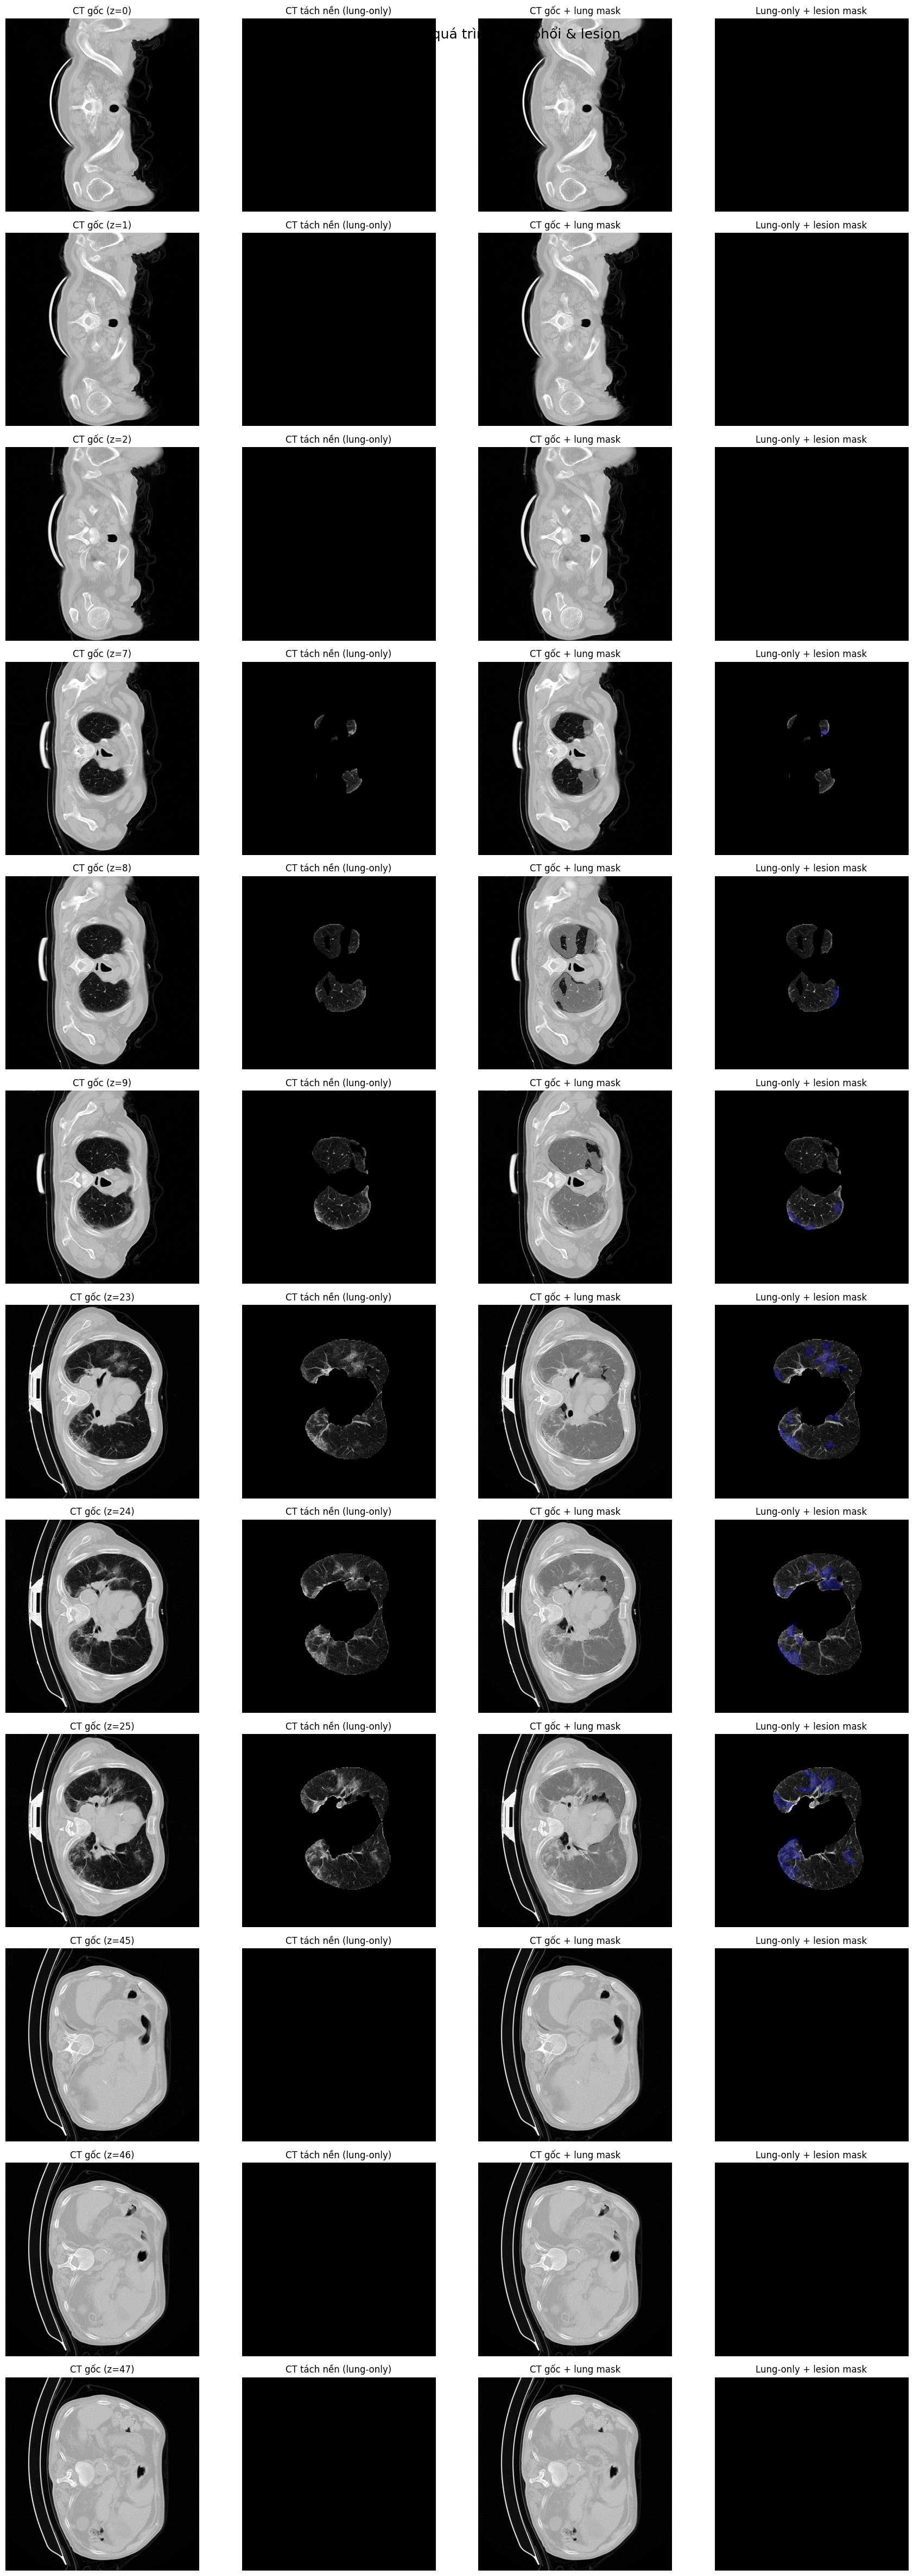

In [14]:
# ====== CELL 4 — VẼ CT GỐC + TÁCH NỀN + OVERLAY LUNG + OVERLAY LESION ======
import matplotlib.pyplot as plt
import numpy as np

n_rows = len(z_list)
fig, axes = plt.subplots(n_rows, 4, figsize=(18, 4 * n_rows))

if n_rows == 1:
    axes = np.expand_dims(axes, 0)  # luôn coi là (rows, 4)

for row, z in enumerate(z_list):
    ct_slice      = ct_vol[:, :, z]
    lung_slice    = lung_mask[:, :, z]
    lesion_slice  = lesion_mask[:, :, z]

    # Ảnh gốc & lung-only ở dạng HU
    ct_slice_hu      = ct_slice
    ct_lung_slice_hu = np.where(lung_slice > 0, ct_slice_hu, HU_MIN)

    # Convert sang uint8 để hiển thị
    ct_u8      = hu_to_uint8_slice(ct_slice_hu)
    ct_lung_u8 = hu_to_uint8_slice(ct_lung_slice_hu)

    # 1) CỘT 1: CT gốc
    ax = axes[row, 0]
    ax.imshow(ct_u8, cmap="gray")
    ax.set_title(f"CT gốc (z={z})")
    ax.axis("off")

    # 2) CỘT 2: CT lung-only (nền ngoài phổi được cắt)
    ax = axes[row, 1]
    ax.imshow(ct_lung_u8, cmap="gray")
    ax.set_title("CT tách nền (lung-only)")
    ax.axis("off")

    # 3) CỘT 3: overlay CT gốc + lung mask
    ax = axes[row, 2]
    ax.imshow(ct_u8, cmap="gray")
    ax.imshow(
        np.ma.masked_where(lung_slice == 0, lung_slice),
        cmap="Blues",
        alpha=0.4,
    )
    ax.set_title("CT gốc + lung mask")
    ax.axis("off")

    # 4) CỘT 4: overlay CT lung-only + lesion mask
    ax = axes[row, 3]
    ax.imshow(ct_lung_u8, cmap="gray")
    ax.imshow(
        np.ma.masked_where(lesion_slice == 0, lesion_slice),
        cmap="jet",
        alpha=0.5,
    )
    ax.set_title("Lung-only + lesion mask")
    ax.axis("off")

plt.suptitle(f"Case {case_id} — Kiểm tra quá trình tách phổi & lesion", fontsize=18)
plt.tight_layout()
plt.show()